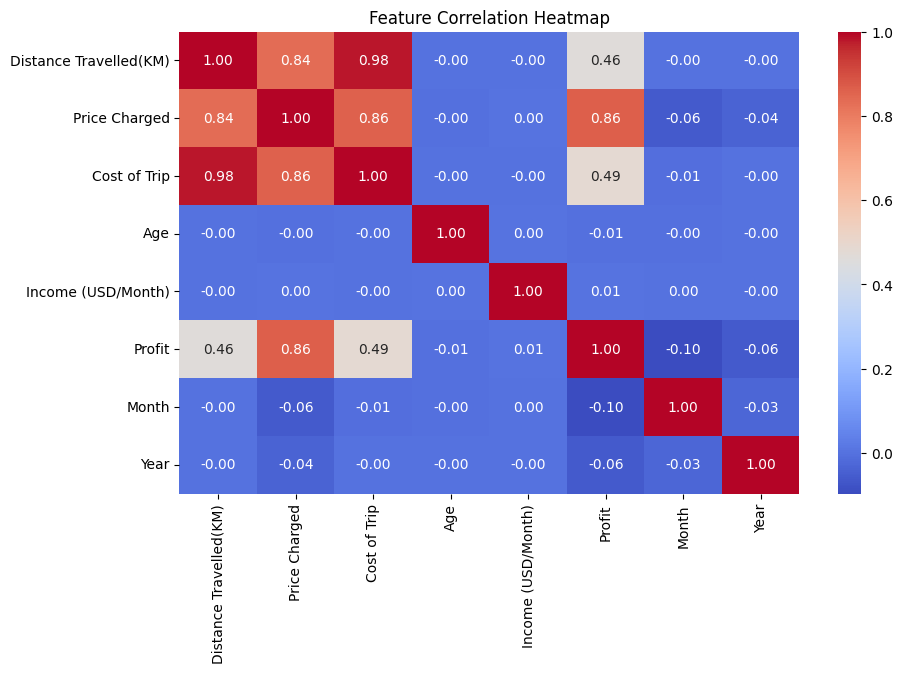

Correlation of features with Profit
Profit                    1.000000
Price Charged             0.864154
Cost of Trip              0.486056
Distance Travelled(KM)    0.462768
Income (USD/Month)        0.006148
Age                      -0.005093
Year                     -0.060567
Month                    -0.096352
Name: Profit, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/merged_data.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Convert 'Date of Travel' to datetime if not already
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"], errors='coerce')

# Extract Month and Year for time-series analysis
df["Month"] = df["Date of Travel"].dt.month
df["Year"] = df["Date of Travel"].dt.year

# Drop non-numeric columns before correlation analysis
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Print correlation with Profit (or another target variable you want to predict)
target_variable = "Profit"  # Change to "Price Charged", "Distance Travelled(KM)", etc., as needed
print("Correlation of features with", target_variable)
print(correlation_matrix[target_variable].sort_values(ascending=False))


In [ ]:
df.describe()


,Date of Travel,Distance Travelled(KM),Price Charged,Cost of Trip,Age,Income (USD/Month),Profit,Month,Year
count,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,2017-08-17 01:37:55.042293760,22.567254,423.443311,286.190113,35.336705,15048.822937,137.253198,7.500434,2017.045199
min,2016-01-02 00:00:00,1.900000,15.600000,19.000000,18.000000,2000.000000,-220.060000,1.000000,2016.000000
25%,2016-11-23 00:00:00,12.000000,206.437500,151.200000,25.000000,8424.000000,28.012000,5.000000,2016.000000
50%,2017-09-10 00:00:00,22.440000,386.360000,282.480000,33.000000,14685.000000,81.962000,8.000000,2017.000000
75%,2018-05-12 00:00:00,32.960000,583.660000,413.683200,42.000000,21035.000000,190.030000,10.000000,2018.000000
max,2018-12-31 00:00:00,48.000000,2048.030000,691.200000,65.000000,35000.000000,1463.966000,12.000000,2018.000000
std,NaN,12.233526,274.378911,157.993661,12.594234,7969.409482,160.311840,3.445095,0.800239


In [ ]:
df.head()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load Data
file_path = "/content/merged_data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Ensure Date is Parsed Correctly
df["Date of Travel"] = pd.to_datetime(df["Date of Travel"])

# Convert Month Names to Numbers (e.g., January → 1, February → 2, ...)
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}
df["Month"] = df["Month"].map(month_mapping)

# Selecting Relevant Columns
selected_features = ["Distance Travelled(KM)", "Company", "City", "Month", "Cost of Trip"]
df_selected = df[selected_features].copy()

# Encode Categorical Variables (Company & City)
label_enc = LabelEncoder()
df_selected["Company"] = label_enc.fit_transform(df_selected["Company"])  # 0 or 1 for Yellow/Pink
df_selected["City"] = label_enc.fit_transform(df_selected["City"])  # Convert City to Numeric

# Check Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Cost of Trip")
plt.show()

# Train a Random Forest Regressor to Get Feature Importance
X = df_selected.drop(columns=["Cost of Trip"])
y = df_selected["Cost of Trip"]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature Importance Plot
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh', color='blue')
plt.title("Feature Importance for Cost Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('/content/merged_data.csv')  # Replace with your file path

# Step 2: Preprocess the data
# Convert 'Date of Travel' to datetime and extract features
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month
data['Travel_Day'] = data['Date of Travel'].dt.day

# Drop the original 'Date of Travel' column
data = data.drop(columns=['Date of Travel'])

# Encode categorical columns
label_encoders = {}
for column in ['Company', 'City', 'Payment_Mode', 'Gender', 'Month']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 3: Train the Random Forest model
X = data.drop(columns=['Profit'])
y = data['Profit']  # Target is company profit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance on Historical Data:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 4: Generate synthetic data for April and May 2025
# Use the last month (December 2018) as a baseline and adjust for trends
last_month_data = data[(data['Travel_Year'] == 2018) & (data['Travel_Month'] == 12)].copy()

# Function to create future data for a given month
def generate_future_data(base_data, year, month, num_trips):
    future_data = base_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)  # Random days
    # Simulate slight growth in Price Charged and Cost of Trip (e.g., 2% increase per year)
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02 * years_diff)
    future_data['Cost of Trip'] *= (1 + 0.02 * years_diff)
    return future_data

# Estimate number of trips per month (average from historical data)
avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)

# Generate data for April and May 2025
april_2025_data = generate_future_data(last_month_data, 2025, 4, avg_trips_per_month)
may_2025_data = generate_future_data(last_month_data, 2025, 5, avg_trips_per_month)

# Step 5: Predict profits for April and May 2025
april_X = april_2025_data.drop(columns=['Profit'])
may_X = may_2025_data.drop(columns=['Profit'])

april_pred_profits = rf_model.predict(april_X)
may_pred_profits = rf_model.predict(may_X)

# Step 6: Aggregate total profits for each month
total_april_profit = april_pred_profits.sum()
total_may_profit = may_pred_profits.sum()

print("\nPredicted Total Company Profits:")
print(f"April 2025: ${total_april_profit:,.2f}")
print(f"May 2025: ${total_may_profit:,.2f}")

# Step 7: Breakdown by company (Pink Cab and Yellow Cab)
# Re-encode Company back to original names for reporting
april_2025_data['Predicted_Profit'] = april_pred_profits
may_2025_data['Predicted_Profit'] = may_pred_profits

# Reverse encoding for Company
company_encoder = label_encoders['Company']
april_2025_data['Company'] = company_encoder.inverse_transform(april_2025_data['Company'])
may_2025_data['Company'] = company_encoder.inverse_transform(may_2025_data['Company'])

# Group by Company
april_profit_by_company = april_2025_data.groupby('Company')['Predicted_Profit'].sum()
may_profit_by_company = may_2025_data.groupby('Company')['Predicted_Profit'].sum()

print("\nProfit Breakdown by Company:")
print("April 2025:")
print(april_profit_by_company)
print("May 2025:")
print(may_profit_by_company)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('/content/merged_data.csv')  # Replace with your file path

# Step 2: Preprocess the data
data['Date of Travel'] = pd.to_datetime(data['Date of Travel'])
data['Travel_Year'] = data['Date of Travel'].dt.year
data['Travel_Month'] = data['Date of Travel'].dt.month
data['Travel_Day'] = data['Date of Travel'].dt.day
data = data.drop(columns=['Date of Travel'])

# Encode categorical columns
label_encoders = {}
for column in ['Company', 'City', 'Payment_Mode', 'Gender', 'Month']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Step 3: Train the Random Forest model (avoiding data leakage)
X = data.drop(columns=['Profit', 'Price Charged', 'Cost of Trip'])
y = data['Profit']  # Target is company profit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance on Historical Data (No Leakage):")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 4: Function to generate synthetic data for user-specified month and year
def generate_future_data(base_data, year, month, num_trips):
    # Use historical data for the same month (if available) or closest month
    historical_month_data = base_data[base_data['Travel_Month'] == month].copy()
    if historical_month_data.empty:  # Fallback to overall data if no month-specific data
        historical_month_data = base_data.copy()

    future_data = historical_month_data.sample(n=num_trips, replace=True, random_state=42).copy()
    future_data['Travel_Year'] = year
    future_data['Travel_Month'] = month
    future_data['Travel_Day'] = np.random.randint(1, 31, size=num_trips)  # Random days
    # Adjust for time difference with 2% annual increase
    years_diff = year - 2018
    future_data['Price Charged'] *= (1 + 0.02 * years_diff)
    future_data['Cost of Trip'] *= (1 + 0.02 * years_diff)
    return future_data.drop(columns=['Profit', 'Price Charged', 'Cost of Trip'])

# Step 5: User input for month and year
avg_trips_per_month = len(data) // (data['Travel_Year'].nunique() * 12)

In [ ]:
# User input for month and year
while True:
    try:
        user_year = int(input("Enter the year for profit prediction (e.g., 2025): "))
        user_month = int(input("Enter the month for profit prediction (1-12): "))
        if 1 <= user_month <= 12 and user_year >= 2019:
            break
        else:
            print("Invalid input. Month must be 1-12, and year must be 2019 or later.")
    except ValueError:
        print("Please enter valid numeric values.")

# Generate data and predict profits
future_data = generate_future_data(data, user_year, user_month, avg_trips_per_month)
future_pred_profits = rf_model.predict(future_data)

# Total predicted profit
total_future_profit = future_pred_profits.sum()
print(f"\nPredicted Total Company Profit for {user_month}/{user_year}: ${total_future_profit:,.2f}")

# Breakdown by company
future_data['Predicted_Profit'] = future_pred_profits
company_encoder = label_encoders['Company']
future_data['Company'] = company_encoder.inverse_transform(future_data['Company'])

# Calculate profits for each company
profit_by_company = future_data.groupby('Company')['Predicted_Profit'].sum()

# Display individual profits in readable format
pink_cab_profit = profit_by_company.get('Pink Cab', 0)  # Default to 0 if not present
yellow_cab_profit = profit_by_company.get('Yellow Cab', 0)

print(f"\nProfit Breakdown by Company for {user_month}/{user_year}:")
print(f"Pink Cab: ${pink_cab_profit:,.2f}")
print(f"Yellow Cab: ${yellow_cab_profit:,.2f}")
print(f"Total (Pink Cab + Yellow Cab): ${(pink_cab_profit + yellow_cab_profit):,.2f}")